In [755]:
#Importings
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from imblearn.combine import SMOTETomek
%config InlineBackend.figure_format = 'retina'
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import zero_one_loss


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning)

In [756]:
#Connect to mysql
conn=pymysql.connect(host='localhost',port=int(3308),user='root',passwd='',db='fid_db')

In [757]:
#select user table
df=pd.read_sql_query("SELECT * FROM fid_client ",conn)
df

,id,civilite,email,date_naissance,date_inscription,id_gouvernorat,nom_prenom,pays,sexe,age,a_une_carte,nbre_total_tampon,nombre_annees,quitte
0,1,2.0,l***@**.xyz,1996-08-31,2020-11-08,4.0,gAAAAABinrnypM4,bizerte,femme,26,1,4,2,1
1,2,2.0,k***@**.xyz,1976-11-24,2020-08-29,4.0,gAAAAABinrnysUY,bizerte,femme,46,1,25,2,1
2,3,2.0,r***@**.xyz,1974-02-27,2021-10-06,4.0,gAAAAABinrny-zh,bizerte,femme,48,1,6,1,1
3,4,2.0,b***@**.xyz,1974-08-24,2020-08-20,4.0,gAAAAABinrnyceg,bizerte,femme,48,1,9,2,1
4,5,2.0,k***@**.xyz,2000-06-08,2021-05-31,4.0,gAAAAABinrnyYK5,bizerte,femme,22,1,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19195,19396,1.0,None,2001-12-31,2021-11-06,17.0,None,sfax,homme,21,0,0,1,0
19196,19397,1.0,None,2000-11-10,2021-08-30,18.0,None,sidi bouzid,homme,22,0,0,1,0
19197,19398,1.0,None,1990-03-29,2020-11-12,15.0,None,monastir,homme,32,0,0,2,0
19198,19399,1.0,None,1979-12-03,2021-06-12,22.0,None,tozeur,homme,43,0,0,1,0


# 1) Data Visualization

id                      AxesSubplot(0.125,0.657941;0.227941x0.222059)
civilite             AxesSubplot(0.398529,0.657941;0.227941x0.222059)
id_gouvernorat       AxesSubplot(0.672059,0.657941;0.227941x0.222059)
age                     AxesSubplot(0.125,0.391471;0.227941x0.222059)
a_une_carte          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
nbre_total_tampon    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
nombre_annees              AxesSubplot(0.125,0.125;0.227941x0.222059)
quitte                  AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

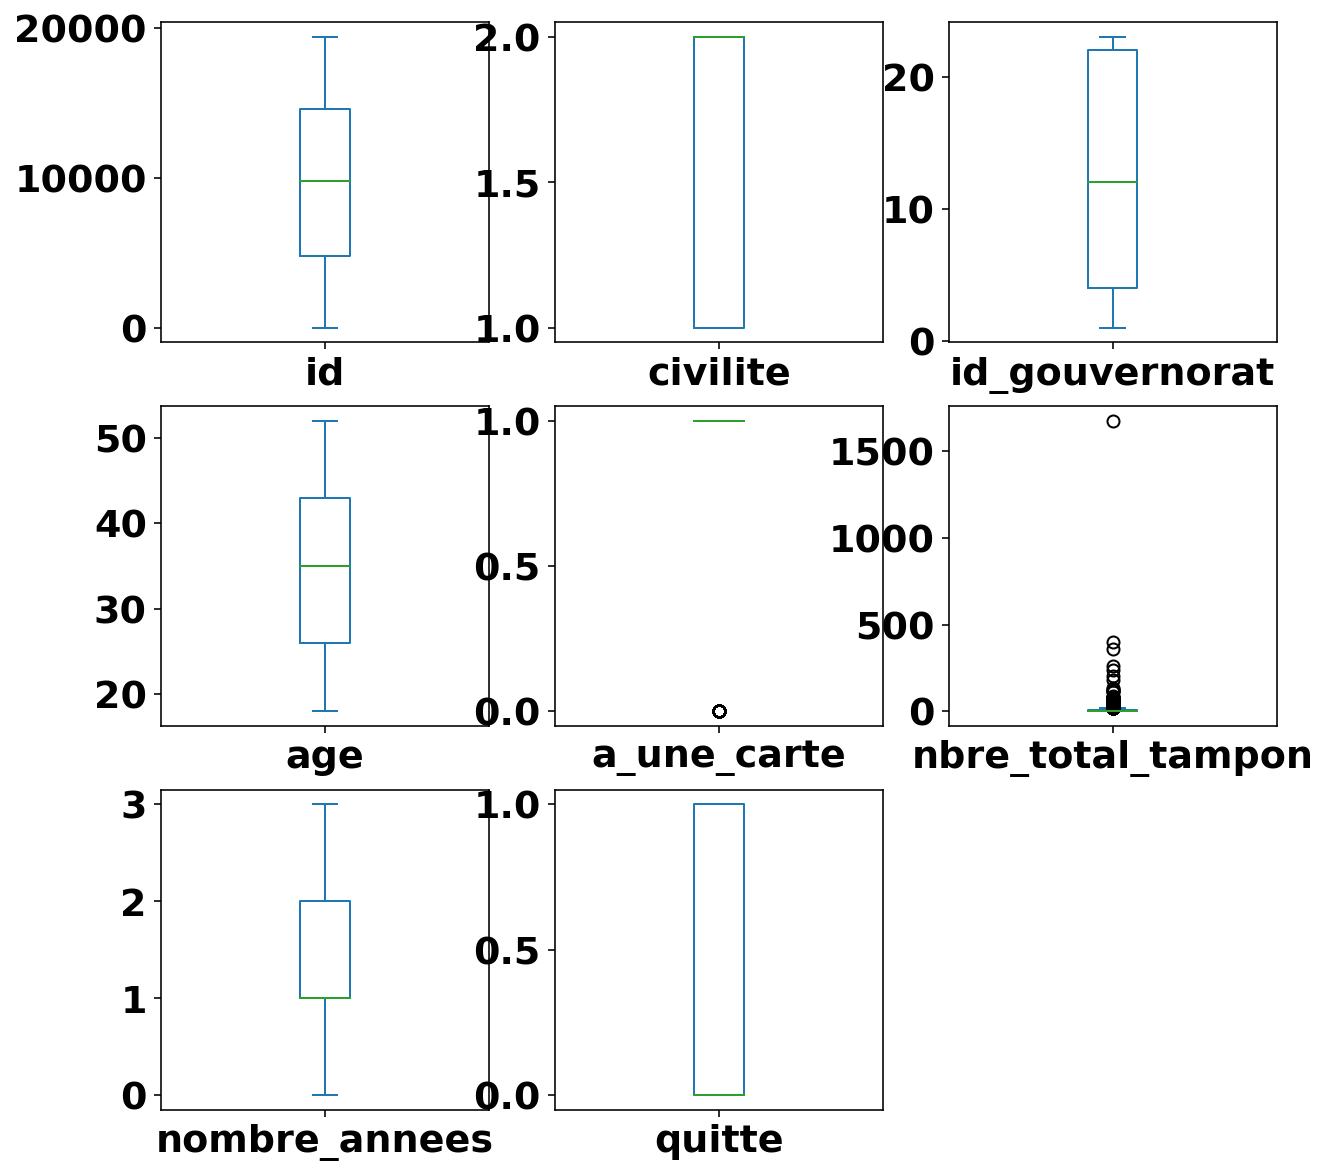

In [758]:
# Boxplot graph for outlier observation analysis
df.plot(kind="box", subplots=True, layout=(3,3), figsize=(10,10))

#### ---------------------------------------------------------------------------------   AGE OUTLIERS   --------------------------------------------------------------------------------------------------------

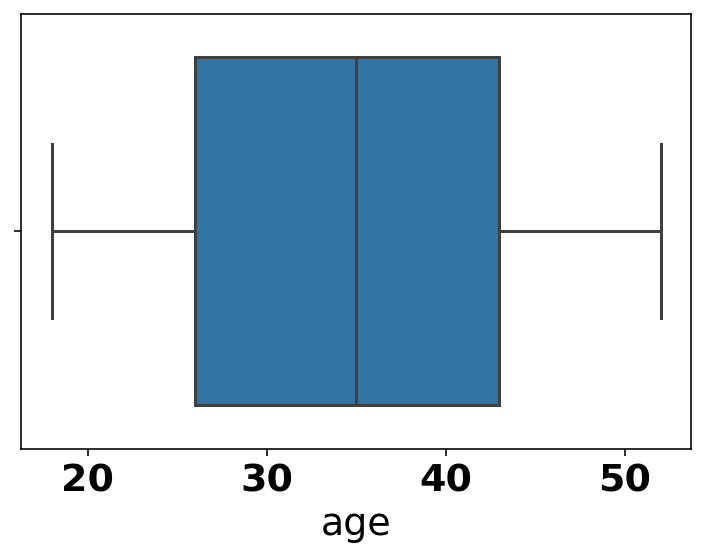

In [759]:
sns.boxplot(df['age'])
upper_limit = df['age'].quantile(0.99)
lower_limit = df['age'].quantile(0.01)
new_df = df[(df['age'] <= 64) & (df['age'] >= 16)]

<AxesSubplot:xlabel='age'>

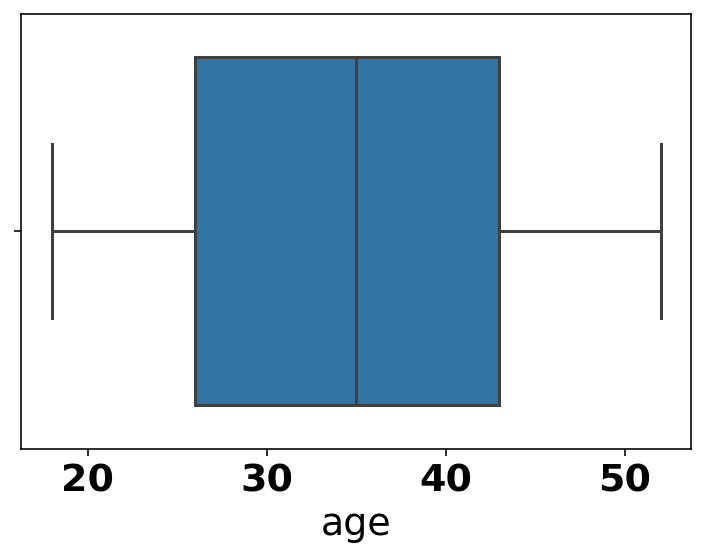

In [760]:
sns.boxplot(new_df['age'])

In [761]:
df=new_df
df

,id,civilite,email,date_naissance,date_inscription,id_gouvernorat,nom_prenom,pays,sexe,age,a_une_carte,nbre_total_tampon,nombre_annees,quitte
0,1,2.0,l***@**.xyz,1996-08-31,2020-11-08,4.0,gAAAAABinrnypM4,bizerte,femme,26,1,4,2,1
1,2,2.0,k***@**.xyz,1976-11-24,2020-08-29,4.0,gAAAAABinrnysUY,bizerte,femme,46,1,25,2,1
2,3,2.0,r***@**.xyz,1974-02-27,2021-10-06,4.0,gAAAAABinrny-zh,bizerte,femme,48,1,6,1,1
3,4,2.0,b***@**.xyz,1974-08-24,2020-08-20,4.0,gAAAAABinrnyceg,bizerte,femme,48,1,9,2,1
4,5,2.0,k***@**.xyz,2000-06-08,2021-05-31,4.0,gAAAAABinrnyYK5,bizerte,femme,22,1,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19195,19396,1.0,None,2001-12-31,2021-11-06,17.0,None,sfax,homme,21,0,0,1,0
19196,19397,1.0,None,2000-11-10,2021-08-30,18.0,None,sidi bouzid,homme,22,0,0,1,0
19197,19398,1.0,None,1990-03-29,2020-11-12,15.0,None,monastir,homme,32,0,0,2,0
19198,19399,1.0,None,1979-12-03,2021-06-12,22.0,None,tozeur,homme,43,0,0,1,0


#### ---------------------------------------------------------------------------------    TAMPON OULIERS   -----------------------------------------------------------------------------------------------------

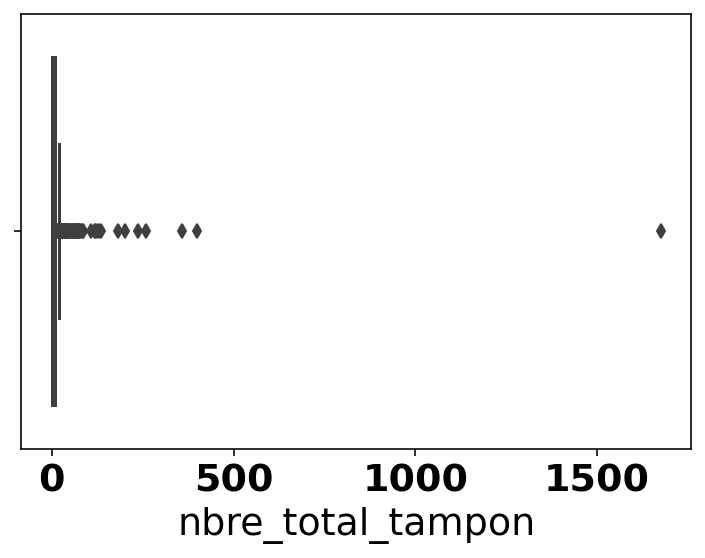

In [762]:
sns.boxplot(df['nbre_total_tampon'])
upper_limit = df['nbre_total_tampon'].quantile(0.99)
lower_limit = df['nbre_total_tampon'].quantile(0.01)
new_df = df[(df['nbre_total_tampon'] <=20) & (df['nbre_total_tampon'] >= 0)]

<AxesSubplot:xlabel='nbre_total_tampon'>

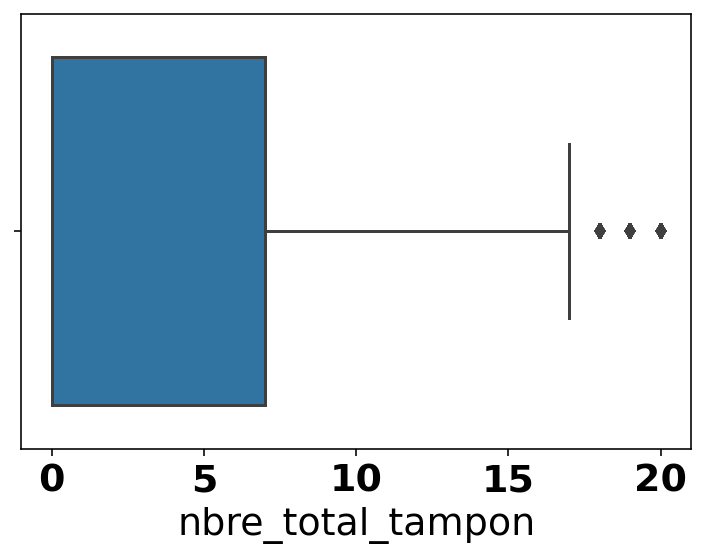

In [763]:
sns.boxplot(new_df['nbre_total_tampon'])

In [764]:
new_df

,id,civilite,email,date_naissance,date_inscription,id_gouvernorat,nom_prenom,pays,sexe,age,a_une_carte,nbre_total_tampon,nombre_annees,quitte
0,1,2.0,l***@**.xyz,1996-08-31,2020-11-08,4.0,gAAAAABinrnypM4,bizerte,femme,26,1,4,2,1
2,3,2.0,r***@**.xyz,1974-02-27,2021-10-06,4.0,gAAAAABinrny-zh,bizerte,femme,48,1,6,1,1
3,4,2.0,b***@**.xyz,1974-08-24,2020-08-20,4.0,gAAAAABinrnyceg,bizerte,femme,48,1,9,2,1
4,5,2.0,k***@**.xyz,2000-06-08,2021-05-31,4.0,gAAAAABinrnyYK5,bizerte,femme,22,1,9,1,1
5,6,2.0,r***@**.xyz,1978-06-10,2020-05-18,4.0,gAAAAABinrnyS3J,bizerte,femme,44,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19195,19396,1.0,None,2001-12-31,2021-11-06,17.0,None,sfax,homme,21,0,0,1,0
19196,19397,1.0,None,2000-11-10,2021-08-30,18.0,None,sidi bouzid,homme,22,0,0,1,0
19197,19398,1.0,None,1990-03-29,2020-11-12,15.0,None,monastir,homme,32,0,0,2,0
19198,19399,1.0,None,1979-12-03,2021-06-12,22.0,None,tozeur,homme,43,0,0,1,0


In [765]:
df=new_df

In [766]:
df=df.dropna()
df.isnull().sum()

id                   0
civilite             0
email                0
date_naissance       0
date_inscription     0
id_gouvernorat       0
nom_prenom           0
pays                 0
sexe                 0
age                  0
a_une_carte          0
nbre_total_tampon    0
nombre_annees        0
quitte               0
dtype: int64

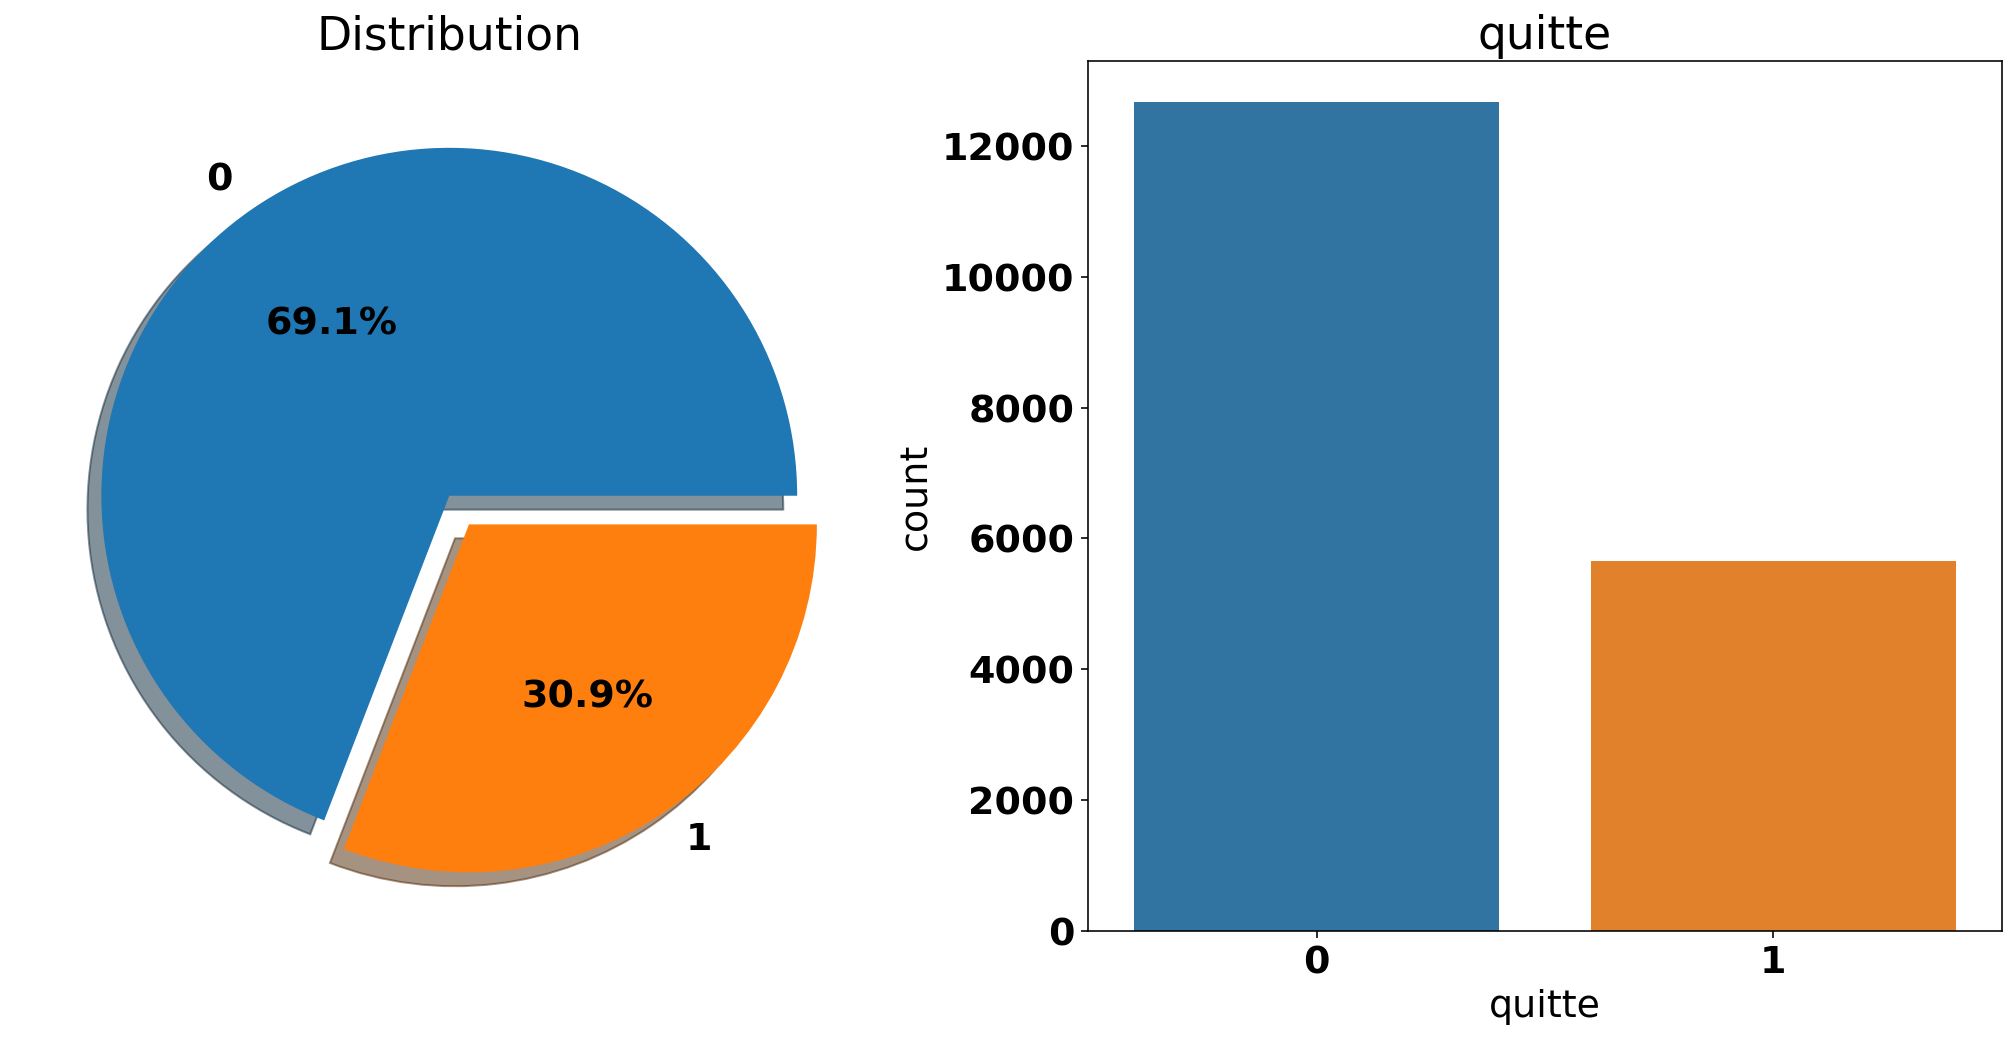

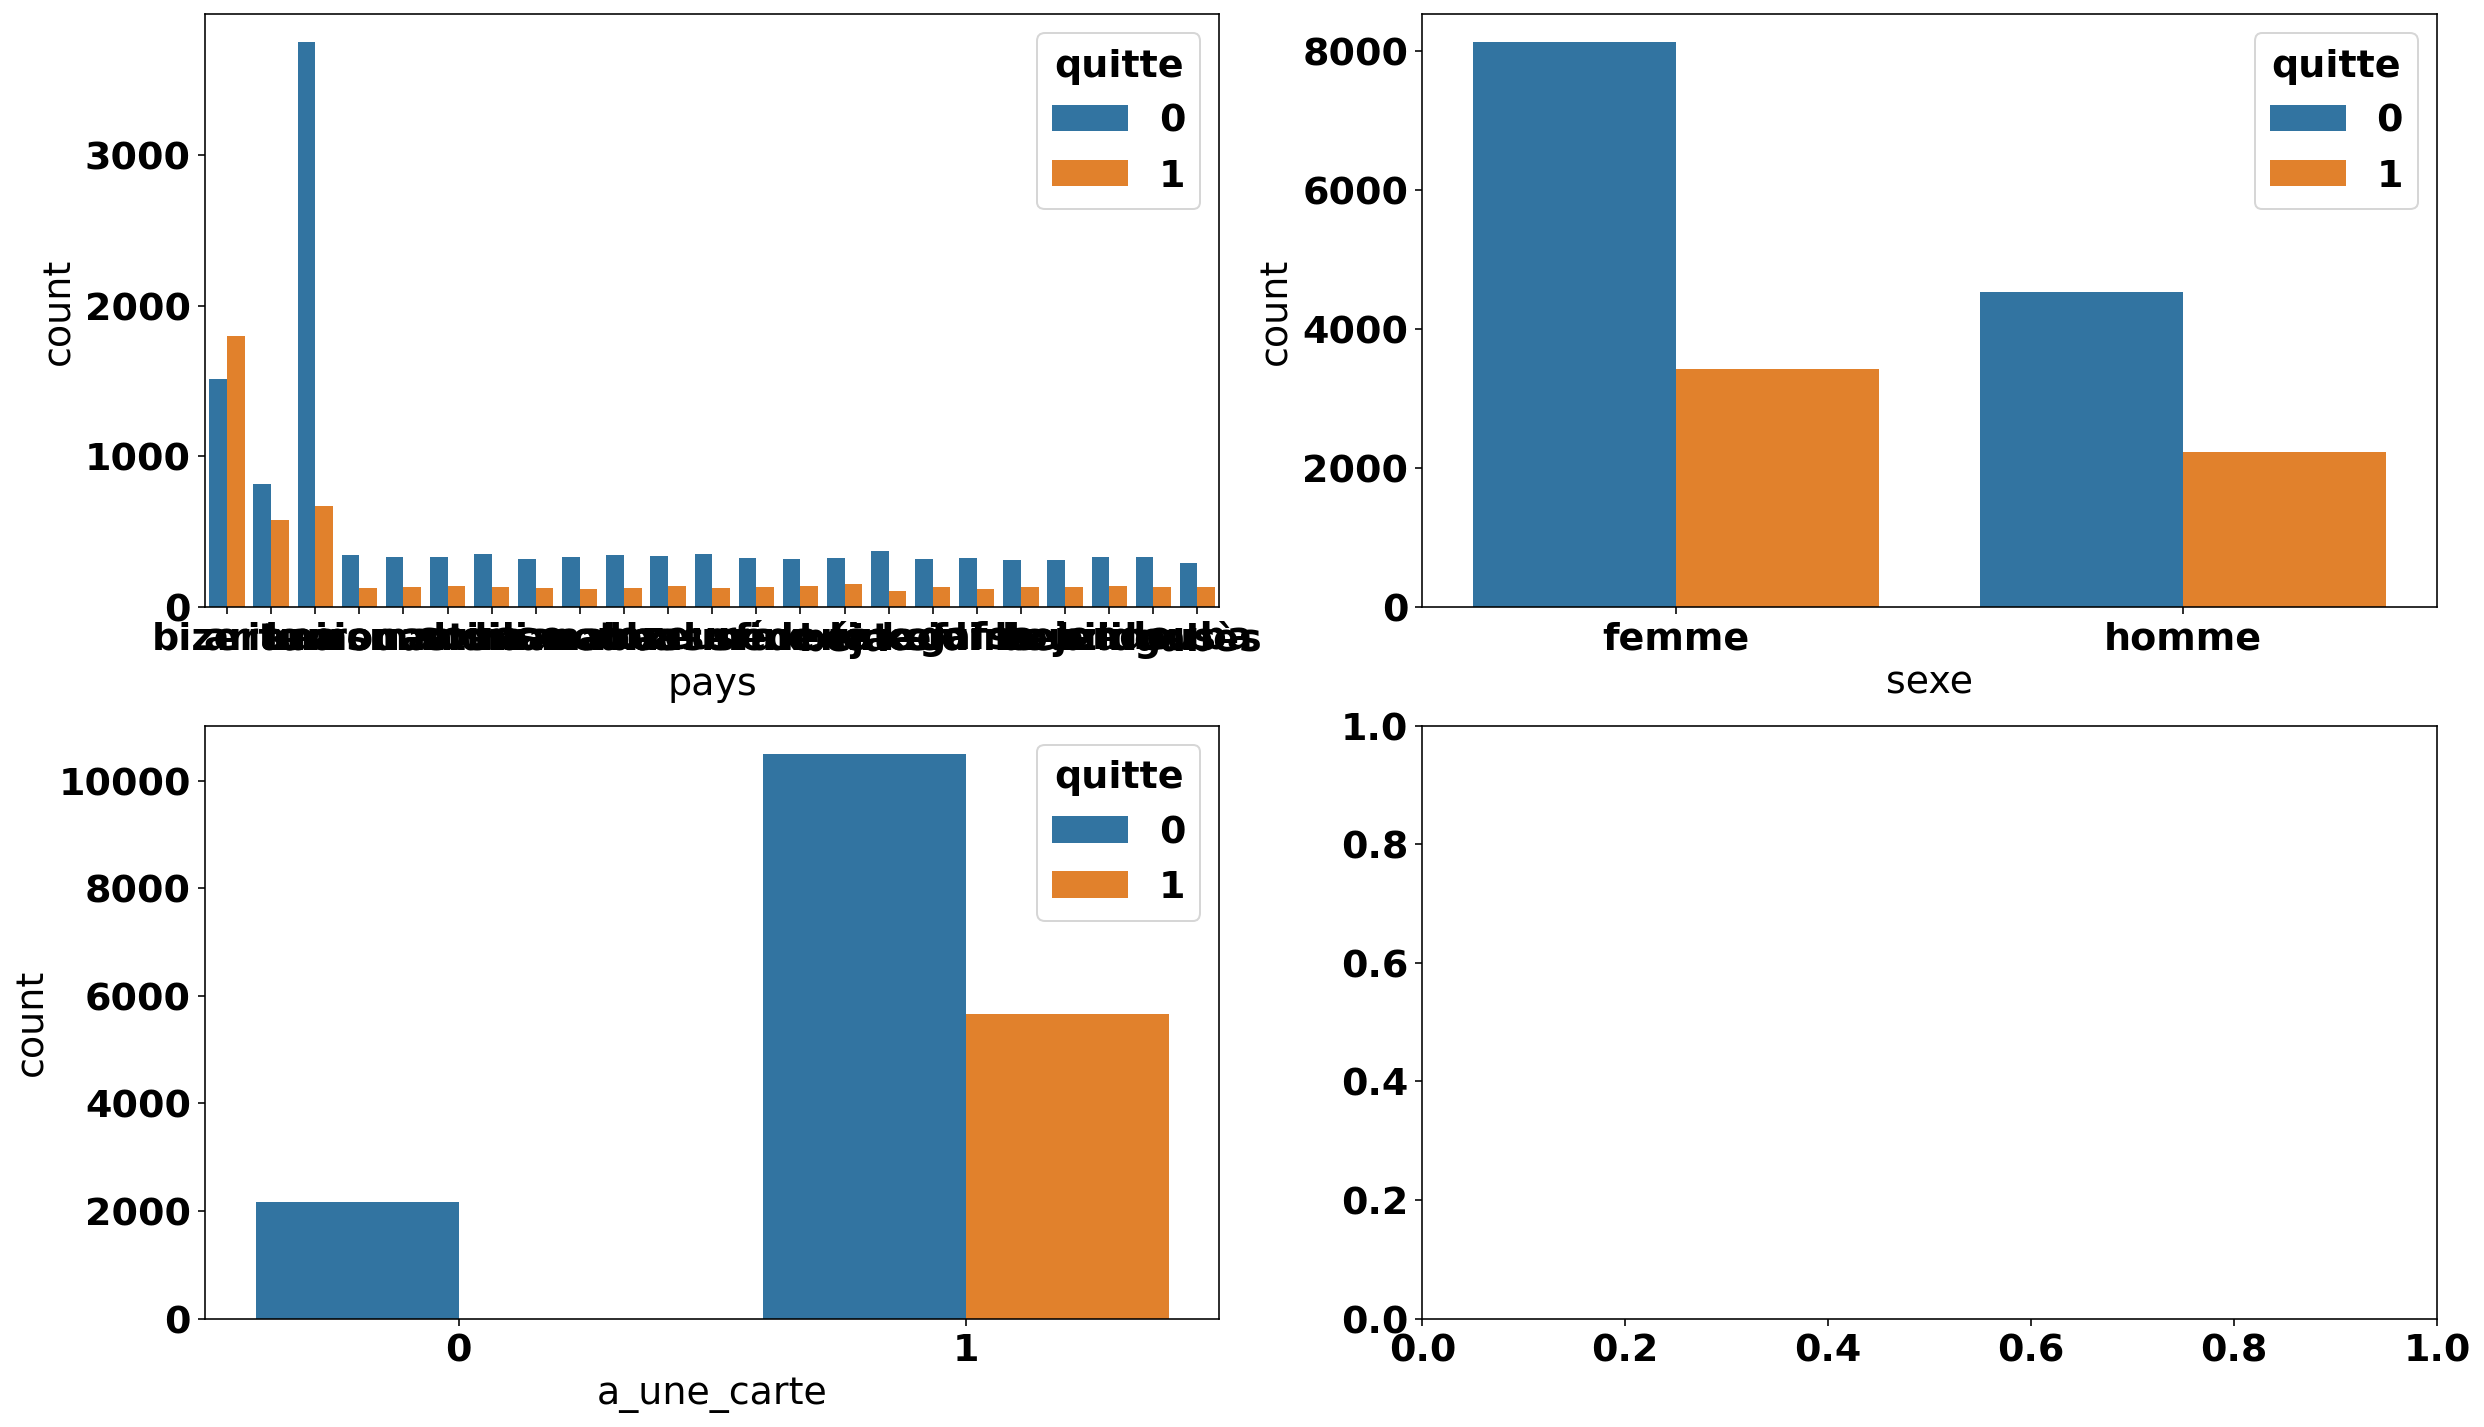

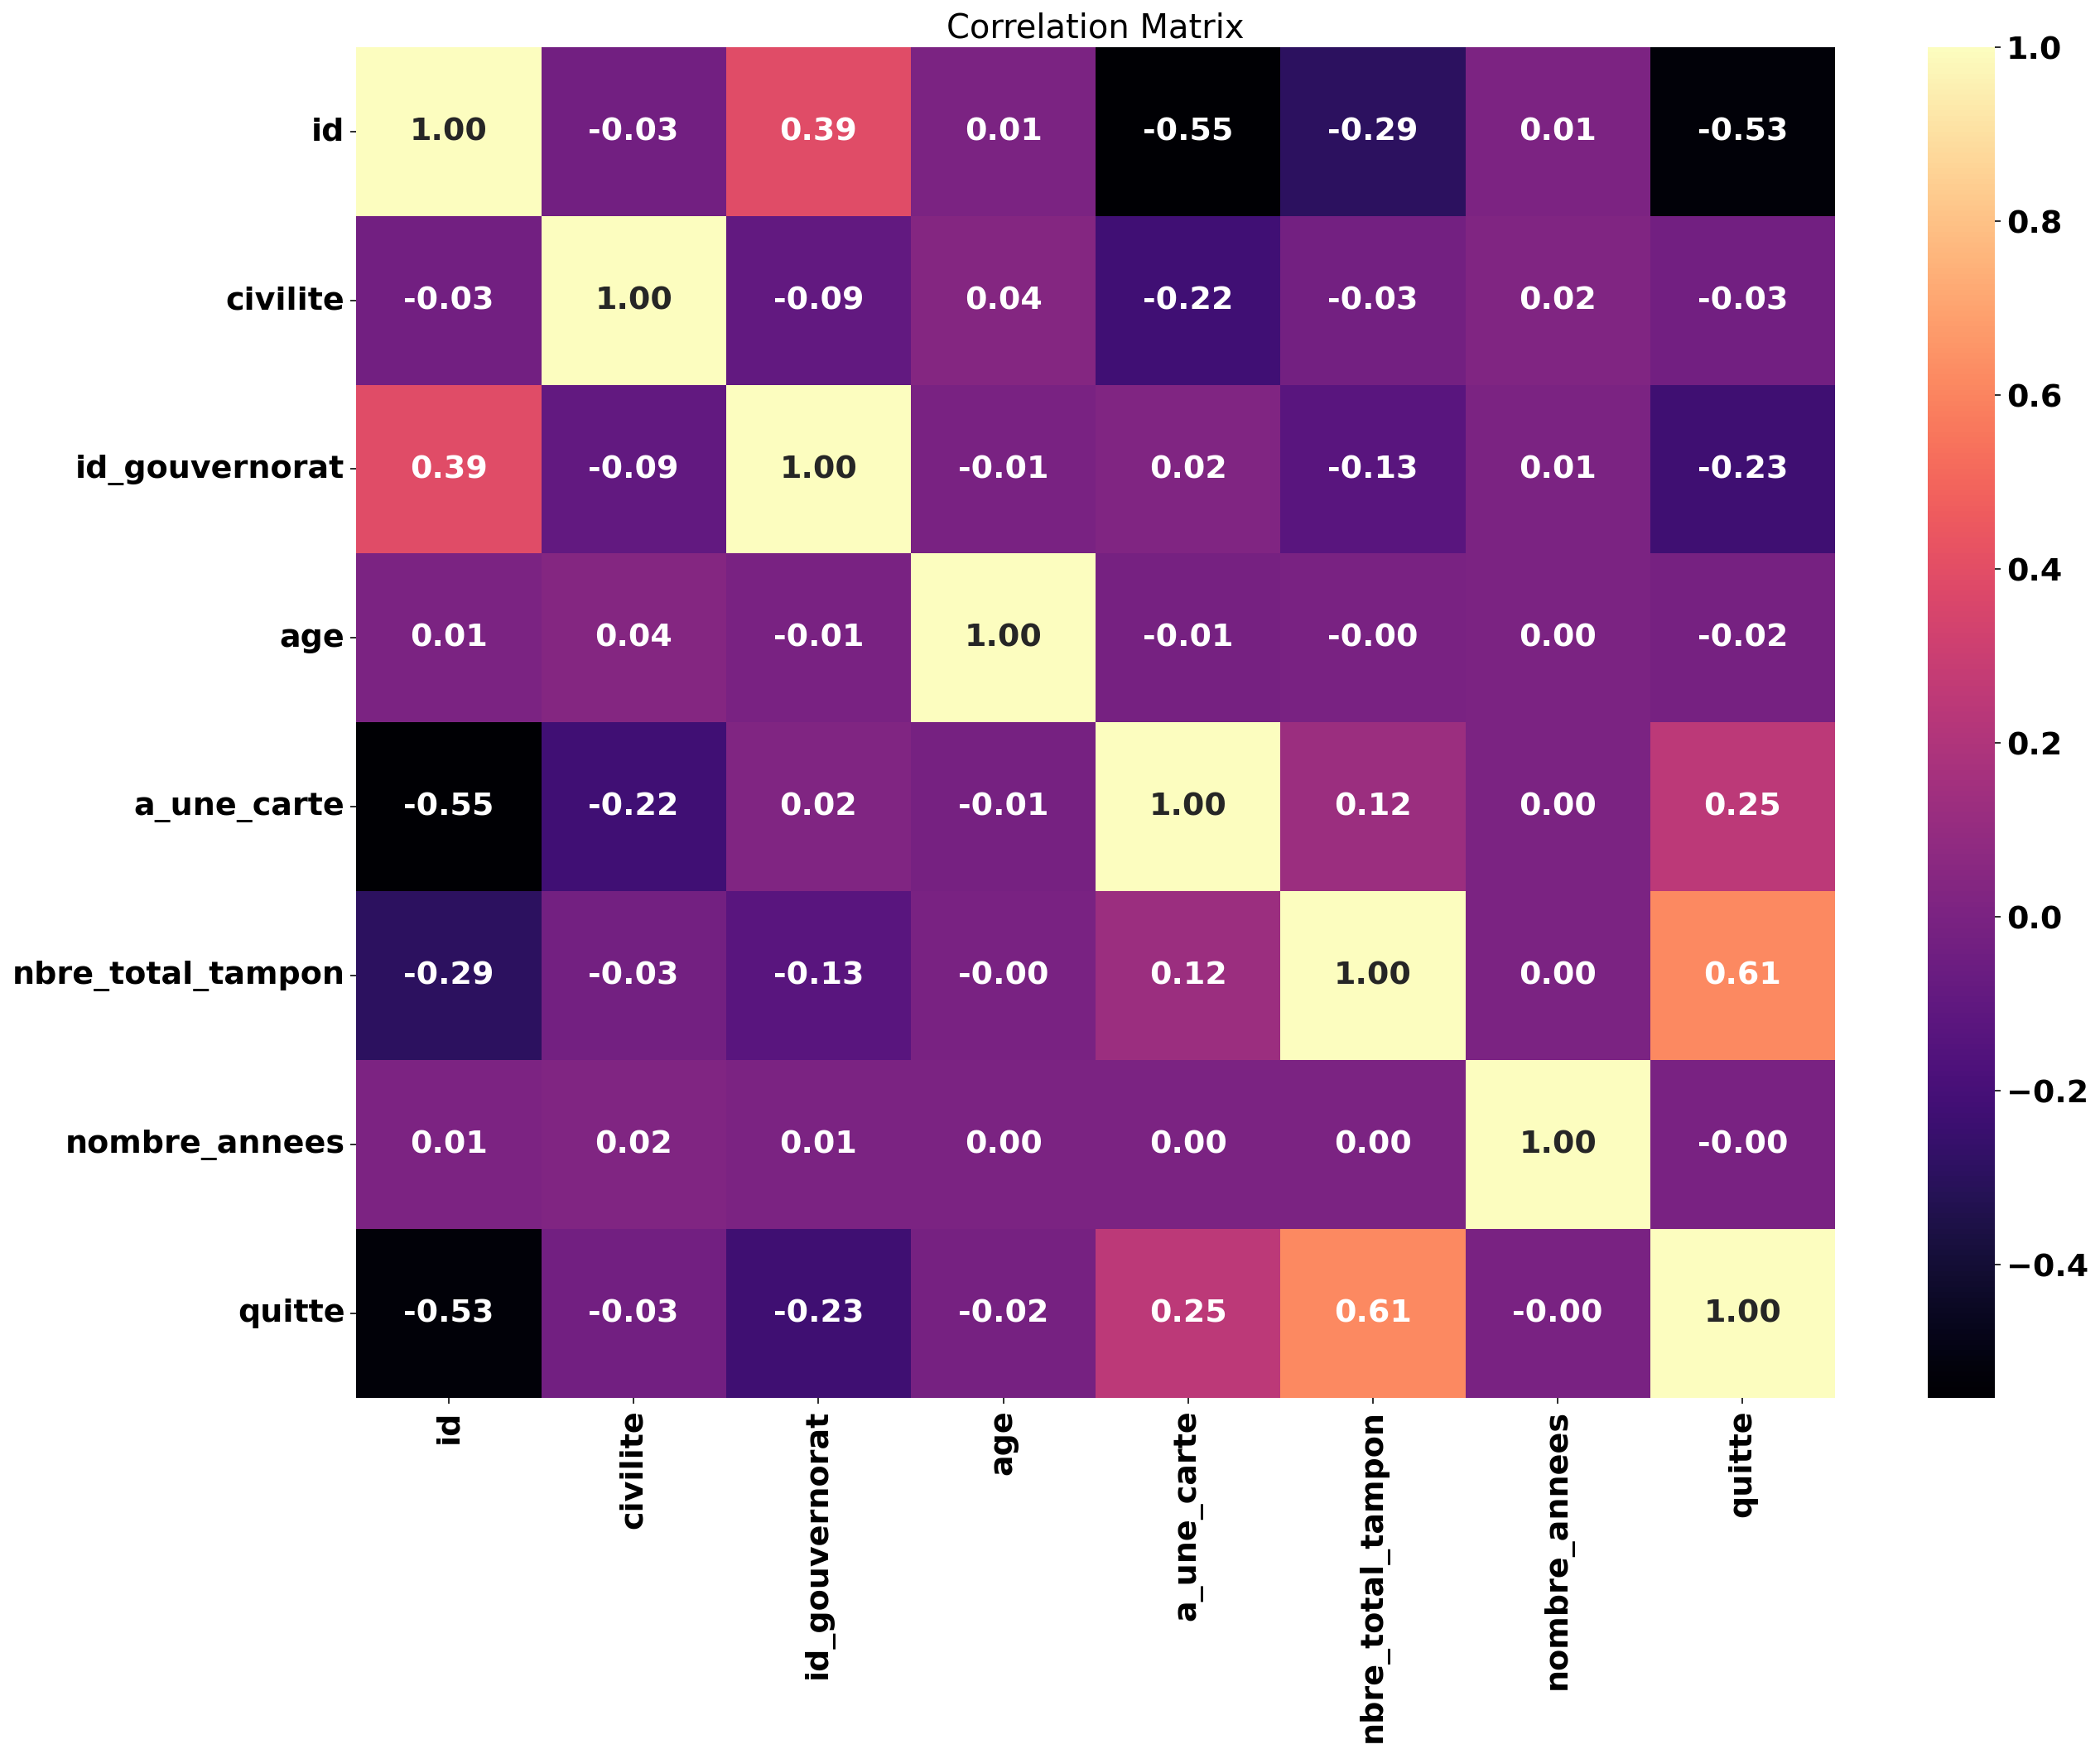

In [767]:
# ------------------------------------------------------1. DATA VISUALIZATION -------------------------------------------------------
def data_visualization(data):
    
    # The distribution of the dependent variable in the data set was analyzed on both pie chart and column chart basis.
    f,ax=plt.subplots(1,2,figsize=(18,8))
    data['quitte'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_title('Distribution')
    ax[0].set_ylabel('')
    sns.countplot('quitte',data=data,ax=ax[1])
    ax[1].set_title('quitte')
    plt.show()

    # Plotted the categorical variables on the basis of the graph of the column according to the dependent variable.
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='pays', hue = 'quitte',data = data, ax=axarr[0][0])
    sns.countplot(x='sexe', hue = 'quitte',data = data, ax=axarr[0][1])
    sns.countplot(x='a_une_carte', hue = 'quitte',data = data, ax=axarr[1][0])
    
    # Correlation Matrix
    f, ax = plt.subplots(figsize= [20,15])
    sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
    ax.set_title("Correlation Matrix", fontsize=20)
    plt.show()

data_visualization(df)

In [768]:
df['civilite'].describe()

count    18328.00000
mean         1.63062
std          0.48265
min          1.00000
25%          1.00000
50%          2.00000
75%          2.00000
max          2.00000
Name: civilite, dtype: float64

# 3) Data Preprocessing & Modelling

In [769]:
# ------------------------------------------------------ 2. DATA PREPROCESSİNG -------------------------------------------------------

def data_prep(df):
        print("----------Missing Values---------")
        print(df.isnull().sum())
        print("-------Outlier Observations-------")
        for feature in df[['nbre_total_tampon','nombre_annees',"age"]]:

            Q1 = df[feature].quantile(0.25)
            Q3 = df[feature].quantile(0.75)
            IQR = Q3-Q1
            lower = Q1- 1.5*IQR
            upper = Q3 + 1.5*IQR

            if df[(df[feature] > upper)].any(axis=None):
                print(feature,"yes")
            else:
                print(feature, "no")
                
# ------------------------------------------------------ 3. FEATURE ENGINEERING ------------------------------------------------------

def feature_engineering(df):
    df["NewAGT"] = df["age"] - df["nombre_annees"]
    df["NewAgeScore"] = df['nombre_annees']/df['age']
    df["NewTamponScore"] = pd.qcut(df['nbre_total_tampon'].rank(method="first"), 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

    return df

# ------------------------------------------------------ 1. ONE-HOT-ENCODING ---------------------------------------------------------
def one_hot_encoding(df):
    df = pd.get_dummies(df, columns = ["pays", "sexe"], drop_first = True)
    df = df.drop(["id","nom_prenom", "email", "age", "date_naissance", "date_inscription","nbre_total_tampon"], axis = 1)
    
    return df

# ------------------------------------------------------ 2. SCALİNG ------------------------------------------------------------------
def scaling(df):
    cat_df = df[["pays_ariana", "pays_ben arous","pays_bizerte"
                 ,"pays_béja","pays_gabès","pays_gafsa","pays_monastir",
                 "pays_nabeul","pays_sfax","pays_sidi bouzid","pays_siliana","pays_sousse",
                 "pays_tataouine","pays_tozeur","pays_tunis","sexe_homme","a_une_carte"]]
    y = df["quitte"]
    X = df.drop(["quitte","pays_ariana", "pays_ben arous","pays_bizerte"
                 ,"pays_béja","pays_gabès","pays_gafsa","pays_monastir",
                 "pays_nabeul","pays_sfax","pays_sidi bouzid","pays_siliana","pays_sousse",
                 "pays_tataouine","pays_tozeur","pays_tunis","sexe_homme","a_une_carte"], axis = 1)
    cols = X.columns
    index = X.index

    from sklearn.preprocessing import RobustScaler
    ss=RobustScaler()
    X = ss.fit_transform(X)
    X = pd.DataFrame(X, columns = cols, index = index)
    X = pd.concat([X, cat_df], axis = 1)
    import pickle
    pickle.dump(ss, open(r'\best_model.pickle', 'wb'))
    
    return X, y

# ------------------------------------------------------ 3. TRAIN-TEST-SPLİT ---------------------------------------------------------
def train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state = 12345)
    return  X_train, X_test, y_train, y_test


# ------------------------------------------------------ 4. BALANCİNG ----------------------------------------------------------------
def balancing(X_train, X_test, y_train, y_test):
    
    # Because it's an unstable data set, we're going to increase the number of samples.
    smk = SMOTETomek()
    # Oversample training  data
    X_train, y_train = smk.fit_resample(X_train, y_train)

    # Oversample validation data
    X_test, y_test = smk.fit_resample(X_test, y_test)
    
    return X_train, X_test, y_train, y_test

# ------------------------------------------------------ 8. MODELS -------------------------------------------------------------------

def model(X_train, X_test, y_train, y_test):

    models = []
    models.append(('LR', LogisticRegression(random_state = 12345)))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
    models.append(('RF', RandomForestClassifier(random_state = 12345)))
    models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
    models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
    models.append(("LightGBM", LGBMClassifier(random_state = 12345)))
    models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

    # evaluate each model in turn
    results = []
    names = []
    
    result_df = pd.DataFrame(columns = ["model", "accuracy_score", "precision_score","recall_score","f1_score", "zero_one"])
    index = 0
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        zero_one = zero_one_loss(y_test, y_pred)
        result_df.at[index, ["model", "accuracy_score", "precision_score","recall_score","f1_score", "zero_one"]] = [name, accuracy, precision, recall, f1, zero_one]
        index += 1
        
    return result_df.sort_values("accuracy_score", ascending = False)

# ------------------------------------------------------ 9) IMPORTANCE of FEATURE VARİABLES -------------------------------------------------------------------

def feature_importance(X_train, X_test, y_train, y_test):
    models2 = []
    models2.append(('CART', DecisionTreeClassifier( random_state = 12345)))
    models2.append(('RF', RandomForestClassifier( random_state = 12345)))
    models2.append(('XGB', GradientBoostingClassifier( random_state = 12345)))
    models2.append(("LightGBM", LGBMClassifier( random_state = 12345)))
    models2.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

    for name, model in models2:
            base = model.fit(X_train,y_train)
            y_pred = base.predict(X_test)
            acc_score = accuracy_score(y_test, y_pred)
            feature_imp = pd.Series(base.feature_importances_,
                            index=X.columns).sort_values(ascending=False)

            sns.barplot(x=feature_imp, y=feature_imp.index)
            plt.xlabel('Variables Importance Scores')
            plt.ylabel('Variables')
            plt.title(name)
            plt.show()

# ------------------------------------------------------ 10) MODEL TUNİNG-------------------------------------------------------------------

def model_tuning(X_train, X_test, y_train, y_test):
    models = []
    models.append(('XGB', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.05, max_depth = 5, min_samples_split = 2, n_estimators = 500, subsample = 0.8)))
    models.append(("LightGBM", LGBMClassifier(random_state = 12345, learning_rate = 0.05, max_depth = 3, n_estimators = 1000)))
    models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False, depth = 10, iterations = 1000, l2_leaf_reg = 5, learning_rate = 0.01)))
    

    # evaluate each model in turn
    results = []
    names = []
    
    model_tuning_result_df = pd.DataFrame(columns = ["tuning_model", "tuning_accuracy_score","precision_score","recall_score","f1_score", "zero_one"])
    index = 0
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        zero_one = zero_one_loss(y_test, y_pred)
        model_tuning_result_df.at[index, ["tuning_model", "tuning_accuracy_score","precision_score","recall_score","f1_score", "zero_one"]] = [name, accuracy,precision, recall, f1, zero_one]
        index += 1
        
    return model_tuning_result_df.sort_values("tuning_accuracy_score", ascending = False)

# ------------------------------------------------------ 11) MODEL TUNİNG IMPORTANCE of FEATURE VARİABLES -------------------------------------------------------------------
models2=[]
def model_tuning_feature_importance(X_train, X_test, y_train, y_test):
    
    models2.append(("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.5, max_depth = 3, n_estimators = 1000)))

    # evaluate each model in turn
    results = []
    names = []

    for name, model_lgbm in models2:
            base = model_lgbm.fit(X_train,y_train)
            y_pred = base.predict(X_test)
            acc_score = accuracy_score(y_test, y_pred)
            feature_imp = pd.Series(base.feature_importances_,
                            index=X.columns).sort_values(ascending=False)

            sns.barplot(x=feature_imp, y=feature_imp.index)
            plt.xlabel("Model Tuning Variables Importance Scores")
            plt.ylabel('Variables')
            plt.title(name)
            plt.show()
            
    return model_lgbm

# ------------------------------------------------------ 11) RESULTS-------------------------------------------------------------------
            
def results(result_df, model_tuning_result_df):
    
    df_results = pd.concat([result_df, model_tuning_result_df], axis = 1)
    
    return df_results


# ------------------------------------------------------ 12) CONFUSION MATRIX-----------------------------------------------------------
def confusion_matrix(model_lgbm):
    
    from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
    y_pred = model_lgbm.predict(X_test)
    cm_xgb = confusion_matrix(y_test, y_pred=y_pred)

    TP = cm_xgb[1, 1]
    TN = cm_xgb[0, 0]
    FP = cm_xgb[0, 1]
    FN = cm_xgb[1, 0]

    from matplotlib import rc,rcParams
    def plot_confusion_matrix(cm, classes,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):

        plt.rcParams.update({'font.size': 19})
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title,fontdict={'size':'16'})
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
        plt.yticks(tick_marks, classes,fontsize=12,color="blue")
        rc('font', weight='bold')
        fmt = '.1f'
        thresh = cm.max()
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="red")

        plt.ylabel('True label',fontdict={'size':'16'})
        plt.xlabel('Predicted label',fontdict={'size':'16'})
        plt.tight_layout()

    import itertools
    plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Churn','Churn'],
                          title='Confusion matrix')

# ------------------------------------------------------ 13) ROC CURVE-----------------------------------------------------------
def roc_curve(model_lgbm):
    
    from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
    y_pred_prob = model_lgbm.predict_proba(X_test)[:,1]
    fig, ax = plt.subplots()
    fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr,tpr)
    ax.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc))
    ax.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
    ax.set_xlabel("False Positive Rate", fontsize = 10)
    ax.set_ylabel("True Positive Rate", fontsize = 10)
    ax.set_title("ROC Curve", fontsize = 18)
    ax.legend(loc = 'best')

    close_default = np.argmin(np.abs(thresholds_roc - 0.5))
    ax.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
    plt.tight_layout()













In [ ]:
lgbm=("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.5, max_depth = 3, n_estimators = 1000)
lgbm.fit(X_train,y_train)

In [ ]:
import pickle
pickle.dump(models2[0][1], open(r'C:\Users\USERTEST\Desktop\Mosh\Freelance projects\project\PlantVillage\models\best_model.pickle', 'wb'))

## 3.1) Missing observation and Outlier observation analysis

In [770]:
data_prep(df)

----------Missing Values---------
id                   0
civilite             0
email                0
date_naissance       0
date_inscription     0
id_gouvernorat       0
nom_prenom           0
pays                 0
sexe                 0
age                  0
a_une_carte          0
nbre_total_tampon    0
nombre_annees        0
quitte               0
dtype: int64
-------Outlier Observations-------
nbre_total_tampon yes
nombre_annees no
age no


In [771]:
df = feature_engineering(df)
df.head()

C:\Users\khalil\AppData\Local\Temp/ipykernel_1252/3689210967.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["NewAGT"] = df["age"] - df["nombre_annees"]
C:\Users\khalil\AppData\Local\Temp/ipykernel_1252/3689210967.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["NewAgeScore"] = df['nombre_annees']/df['age']
C:\Users\khalil\AppData\Local\Temp/ipykernel_1252/3689210967.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,id,civilite,email,date_naissance,date_inscription,id_gouvernorat,nom_prenom,pays,sexe,age,a_une_carte,nbre_total_tampon,nombre_annees,quitte,NewAGT,NewAgeScore,NewTamponScore
0,1,2.0,l***@**.xyz,1996-08-31,2020-11-08,4.0,gAAAAABinrnypM4,bizerte,femme,26,1,4,2,1,24,0.076923,7
2,3,2.0,r***@**.xyz,1974-02-27,2021-10-06,4.0,gAAAAABinrny-zh,bizerte,femme,48,1,6,1,1,47,0.020833,7
3,4,2.0,b***@**.xyz,1974-08-24,2020-08-20,4.0,gAAAAABinrnyceg,bizerte,femme,48,1,9,2,1,46,0.041667,9
4,5,2.0,k***@**.xyz,2000-06-08,2021-05-31,4.0,gAAAAABinrnyYK5,bizerte,femme,22,1,9,1,1,21,0.045455,9
5,6,2.0,r***@**.xyz,1978-06-10,2020-05-18,4.0,gAAAAABinrnyS3J,bizerte,femme,44,1,0,2,0,42,0.045455,1


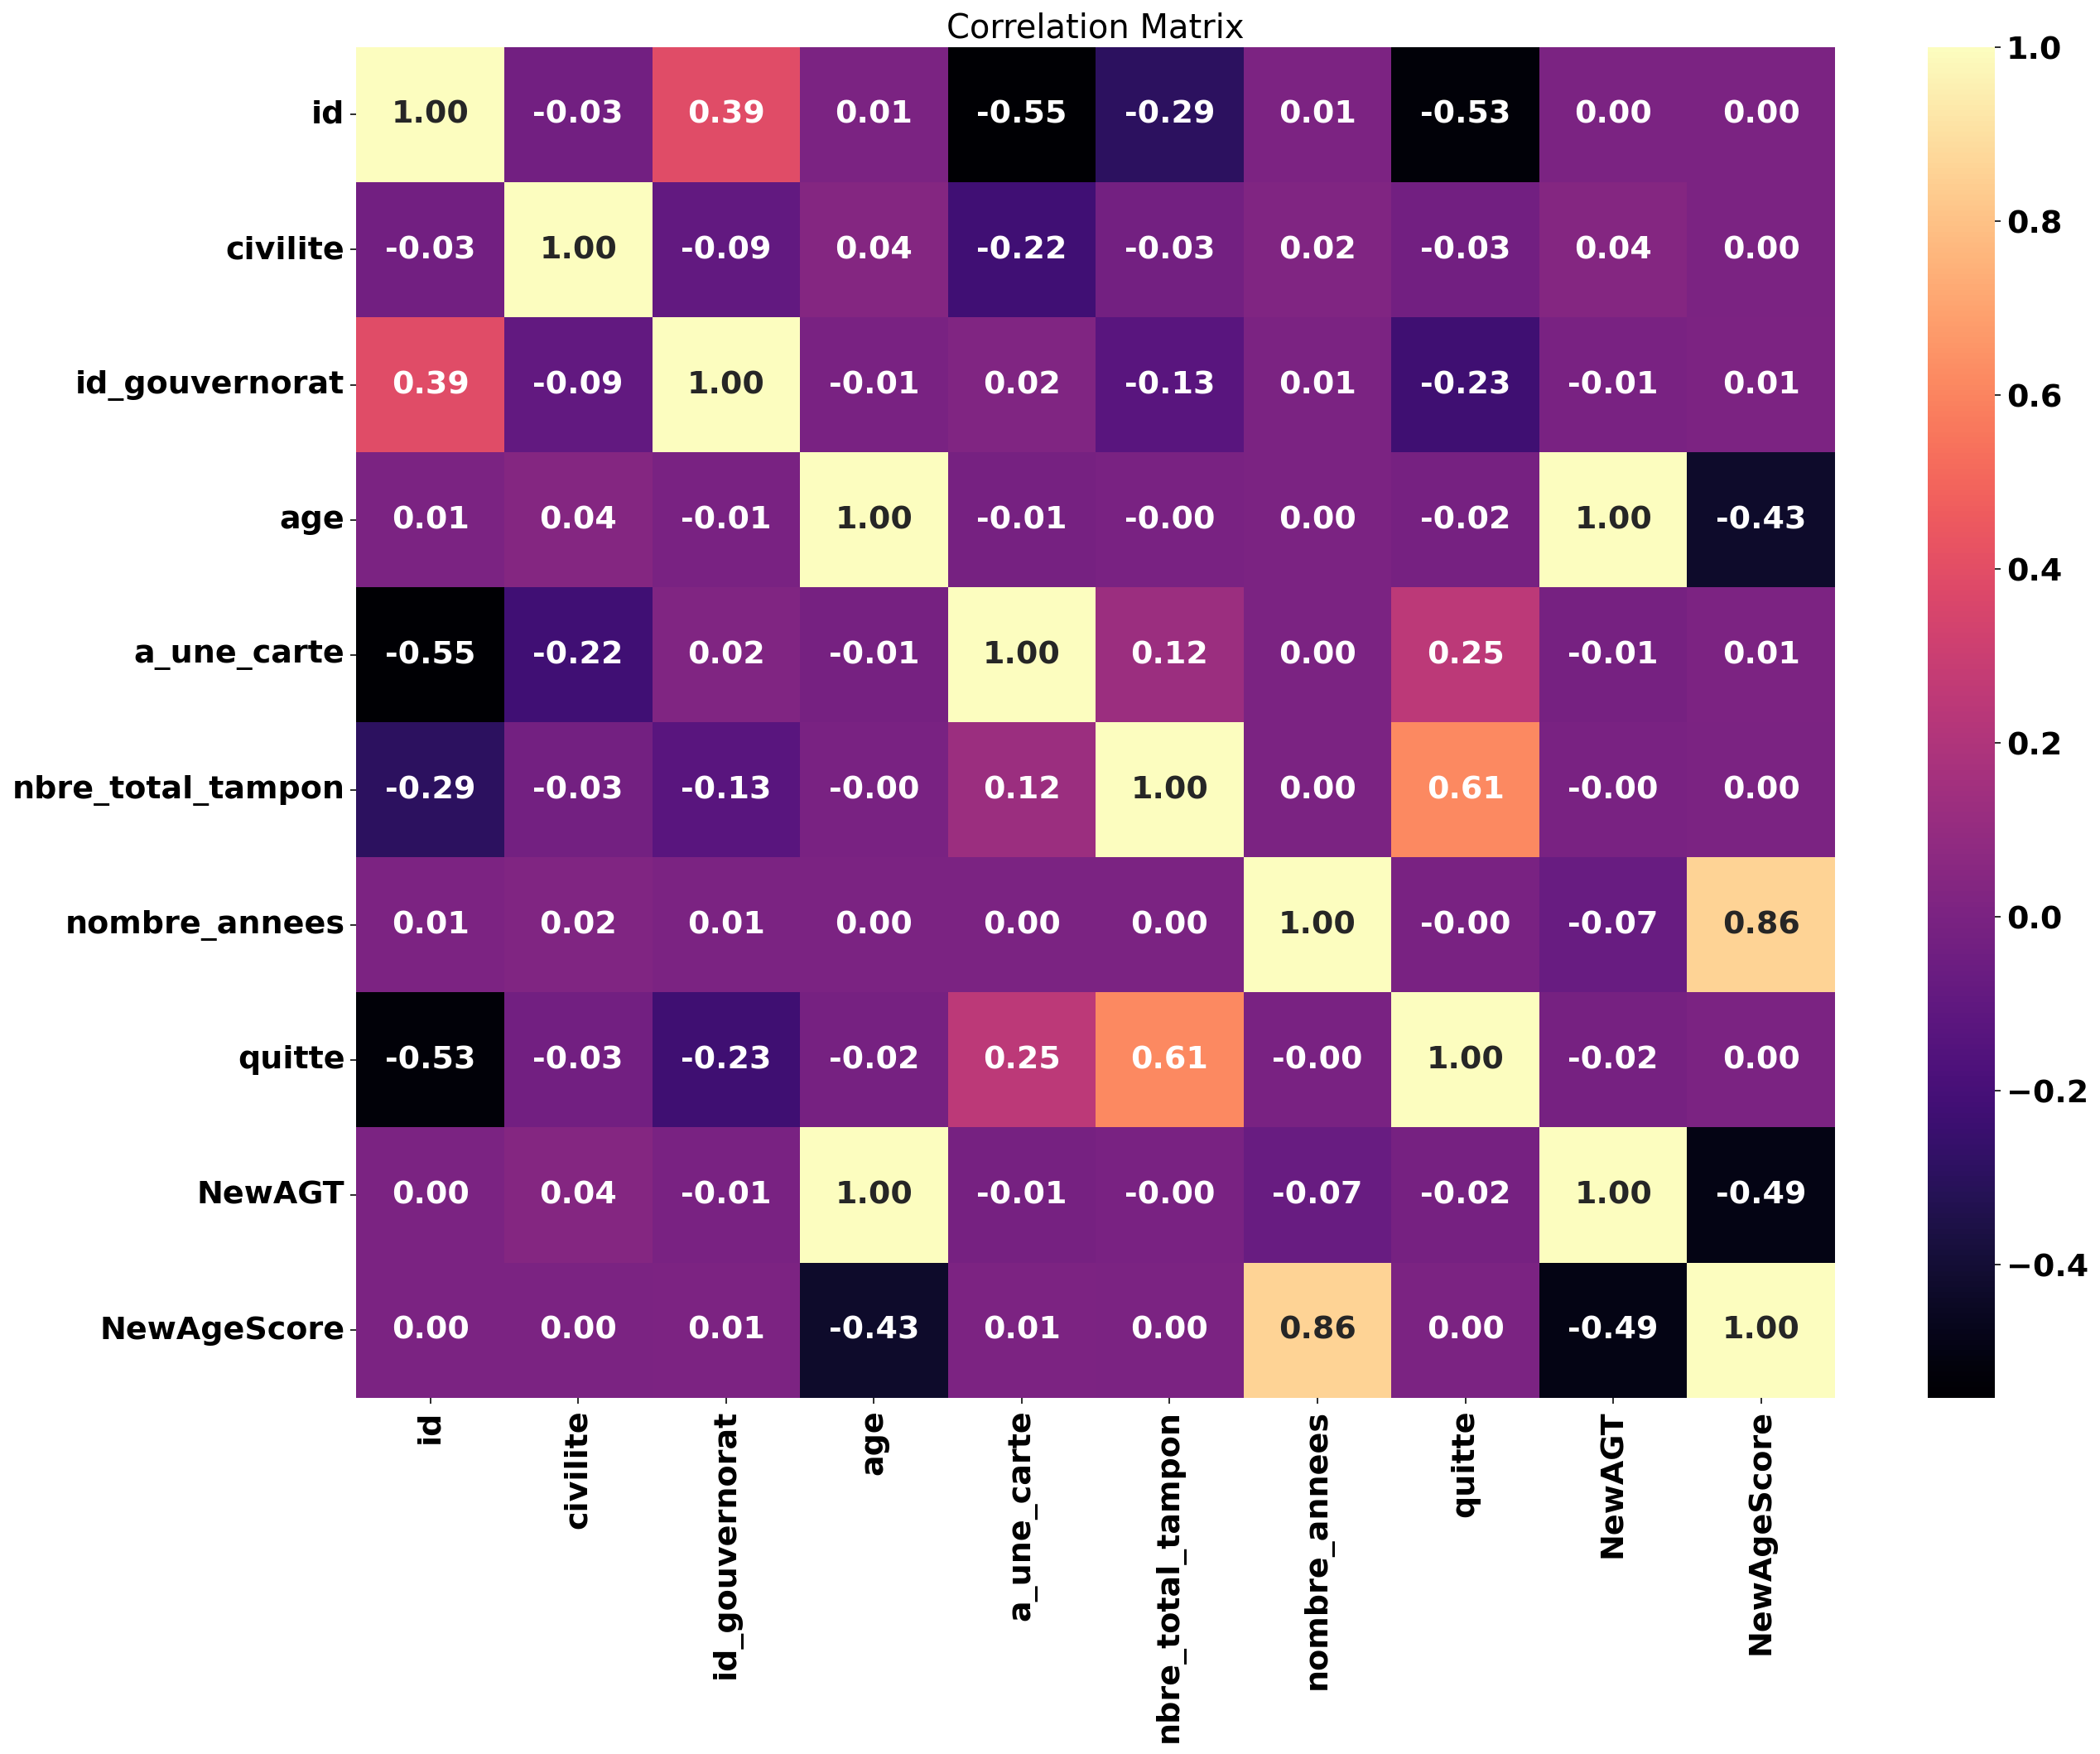

In [772]:
    # Correlation Matrix
    f, ax = plt.subplots(figsize= [20,15])
    sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
    ax.set_title("Correlation Matrix", fontsize=20)
    plt.show()

In [ ]:
['civilite', 'id_gouvernorat', 'a_une_carte', 'nombre_annees', 'quitte',
       'NewAGT', 'NewAgeScore', 'NewTamponScore', 'pays_ariana',
       'pays_ben arous', 'pays_bizerte', 'pays_béja', 'pays_gabès',
       'pays_gafsa', 'pays_jendouba', 'pays_kairouan', 'pays_kasserine',
       'pays_kebili', 'pays_le kef', 'pays_mahdia', 'pays_manouba',
       'pays_monastir', 'pays_nabeul', 'pays_sfax', 'pays_sidi bouzid',
       'pays_siliana', 'pays_sousse', 'pays_tataouine', 'pays_tozeur',
       'pays_tunis', 'sexe_homme']

In [773]:
df.corr()

,id,civilite,id_gouvernorat,age,a_une_carte,nbre_total_tampon,nombre_annees,quitte,NewAGT,NewAgeScore
id,1.000000,-0.034212,0.391179,0.005190,-0.552747,-0.292584,0.009559,-0.534161,0.004454,0.003997
civilite,-0.034212,1.000000,-0.092072,0.041248,-0.219315,-0.030775,0.017810,-0.034548,0.039795,0.000528
id_gouvernorat,0.391179,-0.092072,1.000000,-0.006462,0.022847,-0.133099,0.005001,-0.225565,-0.006823,0.006200
age,0.005190,0.041248,-0.006462,1.000000,-0.014865,-0.002273,0.003266,-0.017584,0.997140,-0.430953
a_une_carte,-0.552747,-0.219315,0.022847,-0.014865,1.000000,0.120652,0.000865,0.245120,-0.014891,0.006387
nbre_total_tampon,-0.292584,-0.030775,-0.133099,-0.002273,0.120652,1.000000,0.004903,0.613704,-0.002637,0.001974
nombre_annees,0.009559,0.017810,0.005001,0.003266,0.000865,0.004903,1.000000,-0.002100,-0.072316,0.855795
quitte,-0.534161,-0.034548,-0.225565,-0.017584,0.245120,0.613704,-0.002100,1.000000,-0.017379,0.004006
NewAGT,0.004454,0.039795,-0.006823,0.997140,-0.014891,-0.002637,-0.072316,-0.017379,1.000000,-0.494502
NewAgeScore,0.003997,0.000528,0.006200,-0.430953,0.006387,0.001974,0.855795,0.004006,-0.494502,1.000000


## 3.2) One Hot Encoding

In [774]:
df = one_hot_encoding(df)
df

,civilite,id_gouvernorat,a_une_carte,nombre_annees,quitte,NewAGT,NewAgeScore,NewTamponScore,pays_ariana,pays_ben arous,...,pays_monastir,pays_nabeul,pays_sfax,pays_sidi bouzid,pays_siliana,pays_sousse,pays_tataouine,pays_tozeur,pays_tunis,sexe_homme
0,2.0,4.0,1,2,1,24,0.076923,7,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,4.0,1,1,1,47,0.020833,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,4.0,1,2,1,46,0.041667,9,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,4.0,1,1,1,21,0.045455,9,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.0,4.0,1,2,0,42,0.045455,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18807,2.0,20.0,0,1,0,33,0.029412,8,0,0,...,0,0,0,0,0,1,0,0,0,0
18808,2.0,4.0,0,1,0,48,0.020408,5,0,0,...,0,0,0,0,0,0,0,0,0,0
18809,2.0,3.0,0,1,0,35,0.027778,5,0,1,...,0,0,0,0,0,0,0,0,0,0
18810,2.0,22.0,0,0,0,34,0.000000,6,0,0,...,0,0,0,0,0,0,0,1,0,0


## 3.3) Scaling

In [775]:
X, y = scaling(df)

In [776]:
X.head()

,civilite,id_gouvernorat,nombre_annees,NewAGT,NewAgeScore,NewTamponScore,pays_jendouba,pays_kairouan,pays_kasserine,pays_kebili,...,pays_nabeul,pays_sfax,pays_sidi bouzid,pays_siliana,pays_sousse,pays_tataouine,pays_tozeur,pays_tunis,sexe_homme,a_une_carte
0,0.0,-0.444444,1.0,-0.529412,1.178643,0.3,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,-0.444444,0.0,0.823529,-0.611830,0.3,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,-0.444444,1.0,0.764706,0.053203,0.7,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,-0.444444,0.0,-0.705882,0.174118,0.7,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,0.0,-0.444444,1.0,0.529412,0.174118,-0.9,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


## 3.4) Train-Test Separation

In [777]:
X_train, X_test, y_train, y_test = train_test(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14662, 30) (3666, 30) (14662,) (3666,)


In [778]:
y_train

4735     0
2064     1
9502     0
13005    0
8039     0
        ..
17413    0
4317     0
12163    0
2325     1
12223    0
Name: quitte, Length: 14662, dtype: int64

## 3.5) Balancing

In [779]:
X_train, X_test, y_train, y_test = balancing(X_train, X_test, y_train, y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19704, 30) (4870, 30) (19704,) (4870,)


In [780]:
result_df = model(X_train, X_test, y_train, y_test)
result_df

,model,accuracy_score,precision_score,recall_score,f1_score,zero_one
7,CatBoost,0.919507,0.878754,0.973306,0.923617,0.080493
6,LightGBM,0.917248,0.876296,0.971663,0.921519,0.082752
5,XGB,0.913552,0.864327,0.981109,0.919023,0.086448
4,SVM,0.908008,0.860617,0.973717,0.91368,0.091992
3,RF,0.896099,0.878681,0.919097,0.898434,0.103901
0,LR,0.892813,0.860264,0.937988,0.897446,0.107187
1,KNN,0.8846,0.859501,0.919507,0.888492,0.1154
2,CART,0.872895,0.885072,0.857084,0.870853,0.127105


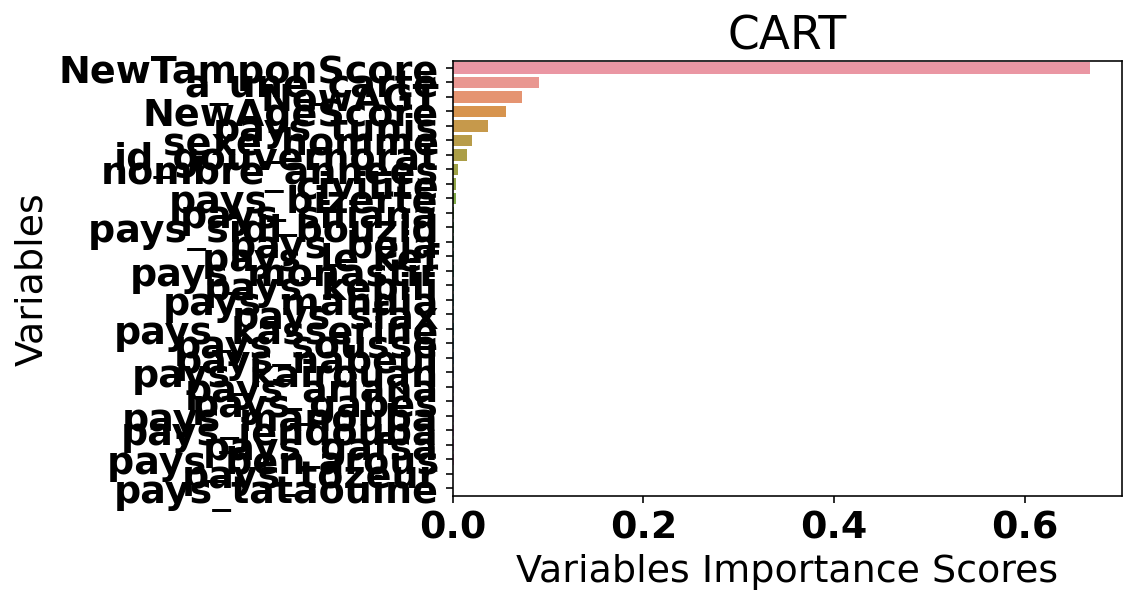

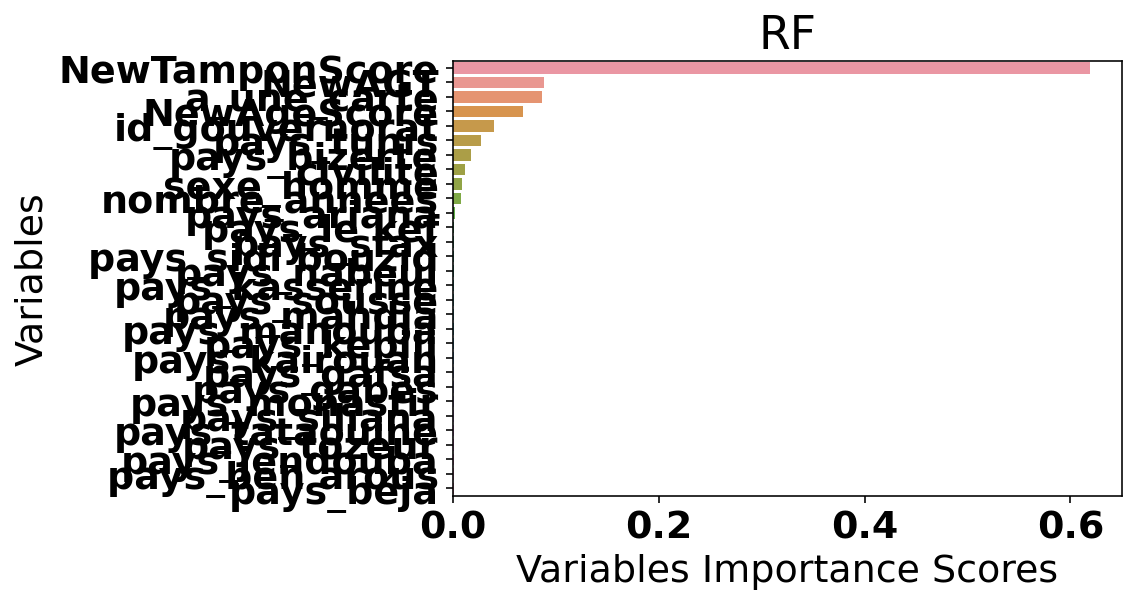

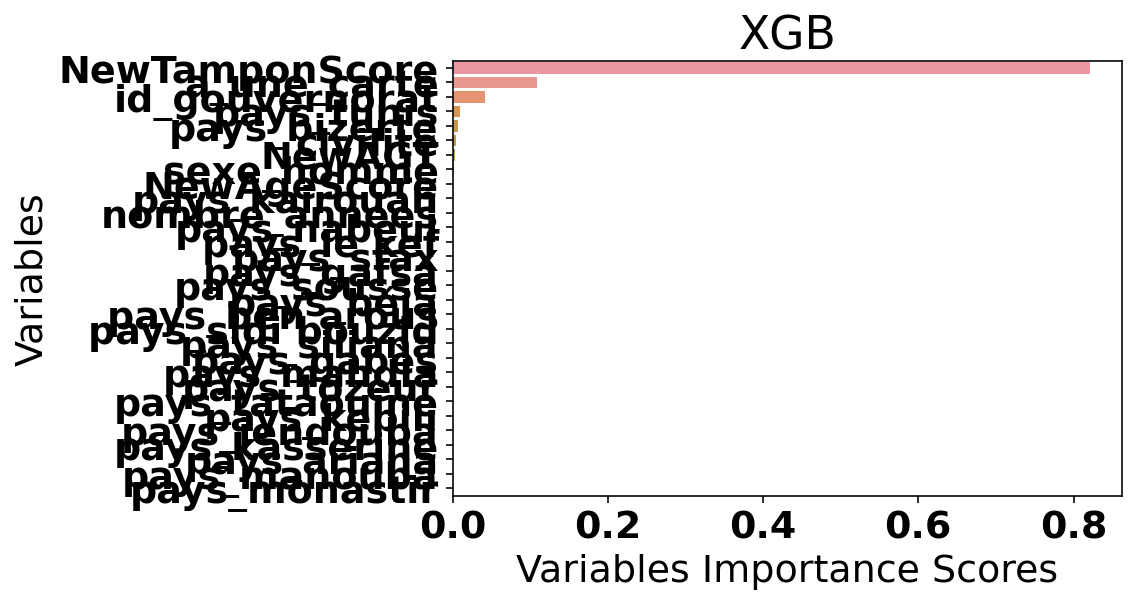

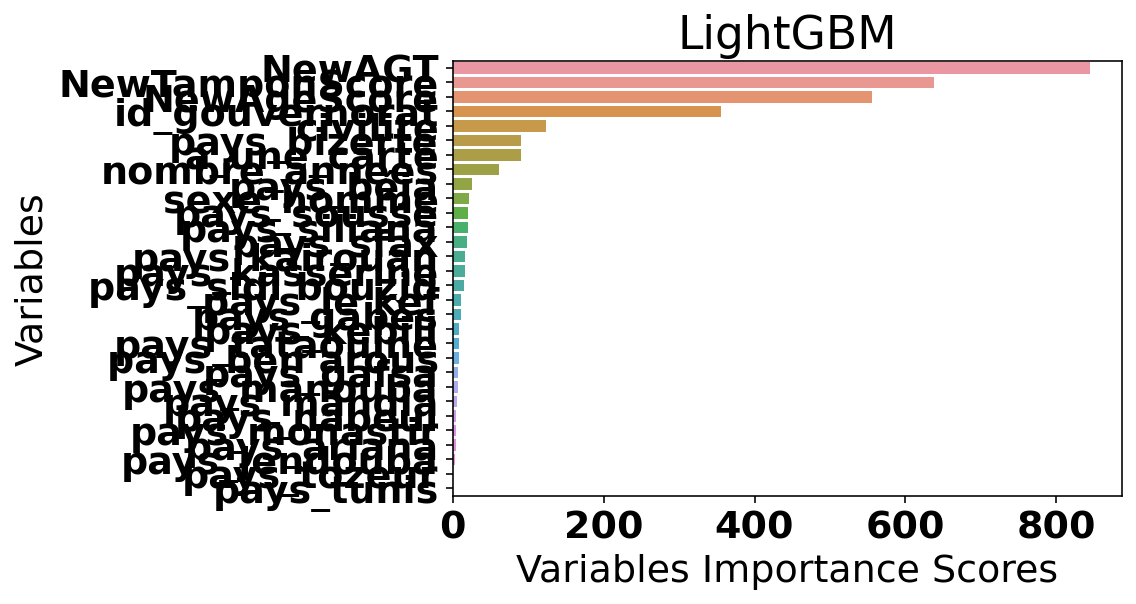

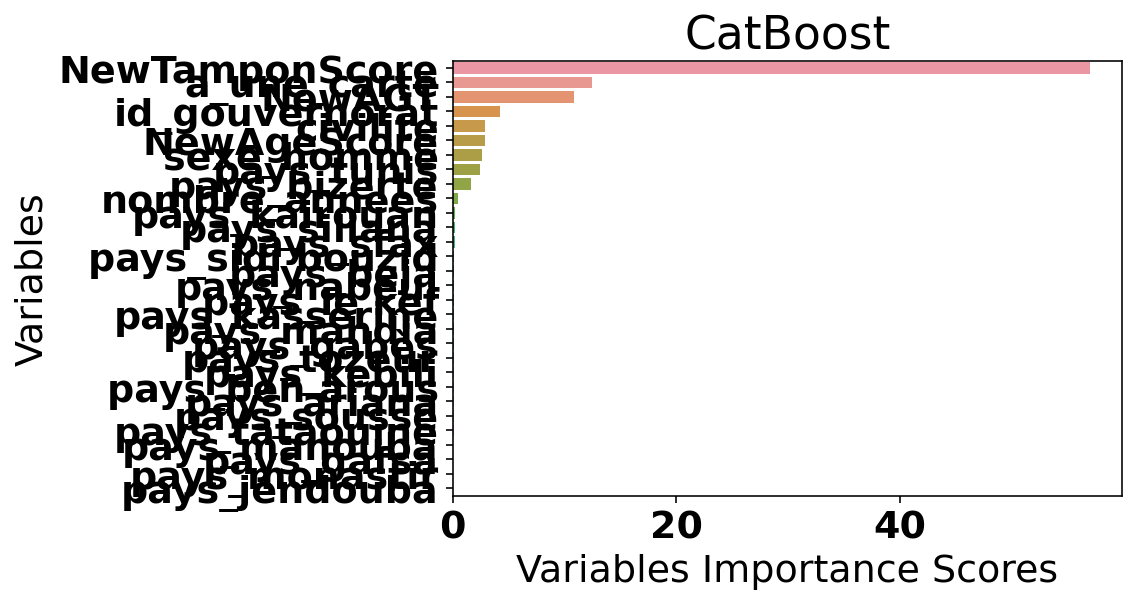

In [781]:
feature_importance(X_train, X_test, y_train, y_test)


In [782]:
# The required hyperparameters have been obtained before.
model_tuning_result_df = model_tuning(X_train, X_test, y_train, y_test)
model_tuning_result_df

,tuning_model,tuning_accuracy_score,precision_score,recall_score,f1_score,zero_one
1,LightGBM,0.918686,0.876338,0.974949,0.923017,0.081314
2,CatBoost,0.917864,0.871757,0.979877,0.92266,0.082136
0,XGB,0.915811,0.879072,0.964271,0.919702,0.084189


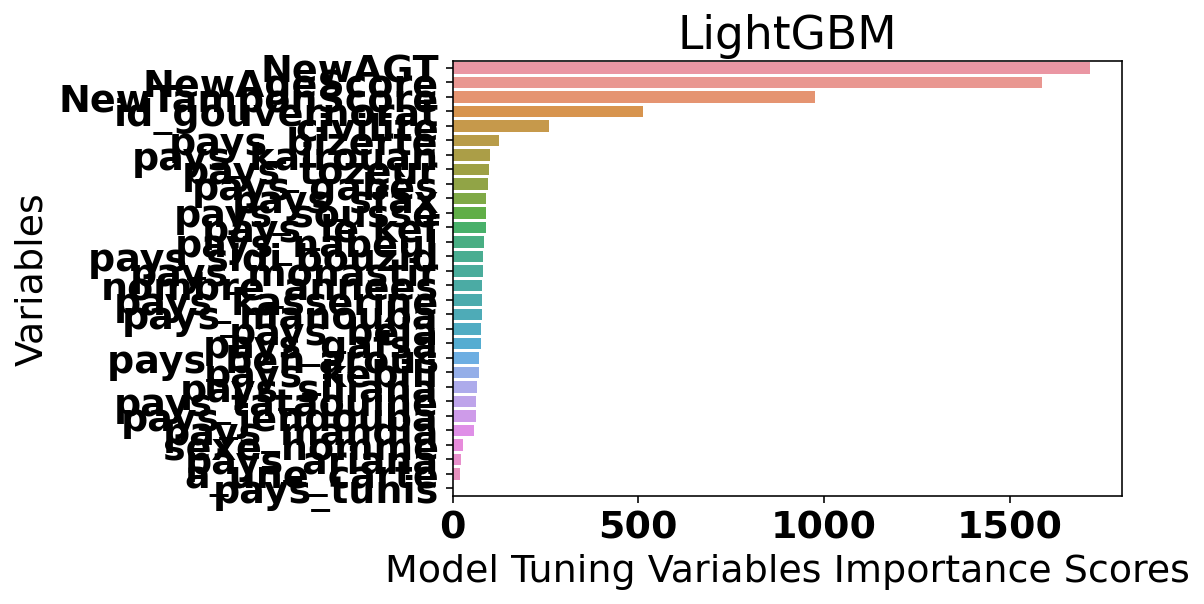

In [783]:
# The variable importance level of the model with the best results was drawn. (LightGBM)
model_lgbm = model_tuning_feature_importance(X_train, X_test, y_train, y_test)

In [784]:
results(result_df, model_tuning_result_df)

,model,accuracy_score,precision_score,recall_score,f1_score,zero_one,tuning_model,tuning_accuracy_score,precision_score,recall_score,f1_score,zero_one
0,LR,0.892813,0.860264,0.937988,0.897446,0.107187,XGB,0.915811,0.879072,0.964271,0.919702,0.084189
1,KNN,0.8846,0.859501,0.919507,0.888492,0.1154,LightGBM,0.918686,0.876338,0.974949,0.923017,0.081314
2,CART,0.872895,0.885072,0.857084,0.870853,0.127105,CatBoost,0.917864,0.871757,0.979877,0.92266,0.082136
3,RF,0.896099,0.878681,0.919097,0.898434,0.103901,NaN,NaN,NaN,NaN,NaN,NaN
4,SVM,0.908008,0.860617,0.973717,0.91368,0.091992,NaN,NaN,NaN,NaN,NaN,NaN
5,XGB,0.913552,0.864327,0.981109,0.919023,0.086448,NaN,NaN,NaN,NaN,NaN,NaN
6,LightGBM,0.917248,0.876296,0.971663,0.921519,0.082752,NaN,NaN,NaN,NaN,NaN,NaN
7,CatBoost,0.919507,0.878754,0.973306,0.923617,0.080493,NaN,NaN,NaN,NaN,NaN,NaN


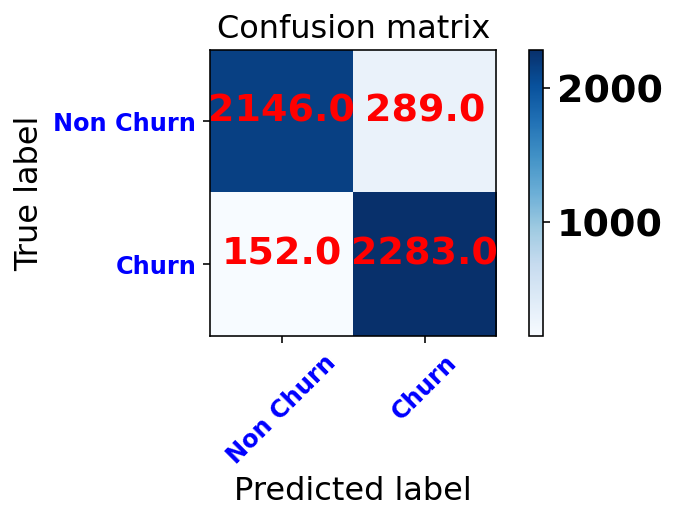

In [785]:
# The confusion matrix of the LightGBM model was drawn.
confusion_matrix(model_lgbm)

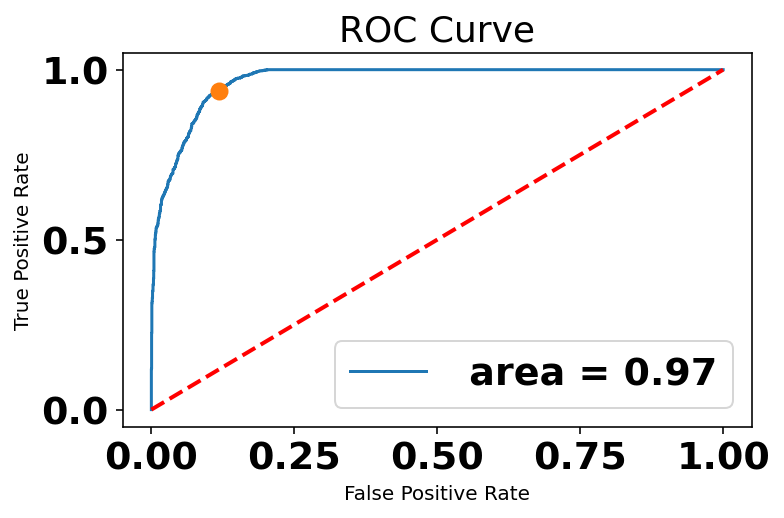

In [786]:
# The ROC curve of the LightGBM model is drawn.
roc_curve(model_lgbm)

In [787]:
y

0        1
2        1
3        1
4        1
5        0
        ..
18807    0
18808    0
18809    0
18810    0
18811    0
Name: quitte, Length: 18328, dtype: int64